# LG
# Day2 Class

# Class2 - 1 : Spectral features (Spectral centroid & Spectral spread & Spectral flatness & MFCC)

import libraries

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy


download audio to colab session

In [112]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR' -O speechbeach1.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=142o7ZeUxJrKlGaROyk0uNU9VWnjxPax8' -O T08-violin.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13y7WQH68D1xFIGs7ftw373iSWV-t0PNM' -O T39-piano.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10PLlTJWOXSj19Wnr8NVdNwqPi0-5ppQG' -O public_square.wav

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NbI16m44fvjw2NkiVj2G4DW8a-b_Wz4H' -O mix.wav


print('download complete')

--2020-02-16 11:32:39--  https://docs.google.com/uc?export=download&id=1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR
Resolving docs.google.com (docs.google.com)... 64.233.184.113, 64.233.184.101, 64.233.184.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fa1mrdgtd8htd9460bpsko162fb82t8c/1581852600000/01830637789438172170/*/1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR?e=download [following]
--2020-02-16 11:32:39--  https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fa1mrdgtd8htd9460bpsko162fb82t8c/1581852600000/01830637789438172170/*/1yTLRQbCx_gFgJexh2huoPRfYoNaN7gkR?e=download
Resolving doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs.googleusercontent.com)... 108.177.15.132, 2a00:1450:400c:c0c::84
Connecting to doc-08-4c-docs.googleusercontent.com (doc-08-4c-d

check audio files

In [113]:
!ls

mix.wav		   sample_data	     T08-violin.wav
public_square.wav  speechbeach1.wav  T39-piano.wav


read audio file

In [114]:
audio_path = 'T39-piano.wav'
# audio_path = 'T08-violin.wav'
# audio_path = 'speechbeach1.wav'
# audio_path = 'public_square.wav'

audio, sr = librosa.load(audio_path, sr=None)
print('sample rate of this audio file :', sr, 'Hz')
ipd.Audio(audio, rate=sr, autoplay=False) # play audio

sample rate of this audio file : 44100 Hz


plot waveform of audio file

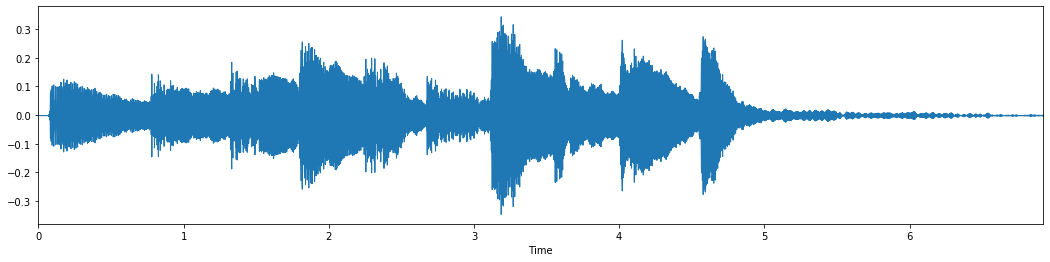

In [115]:
plt.figure(figsize=(18,4))
librosa.display.waveplot(audio, sr)
plt.show()

compute spectrogram

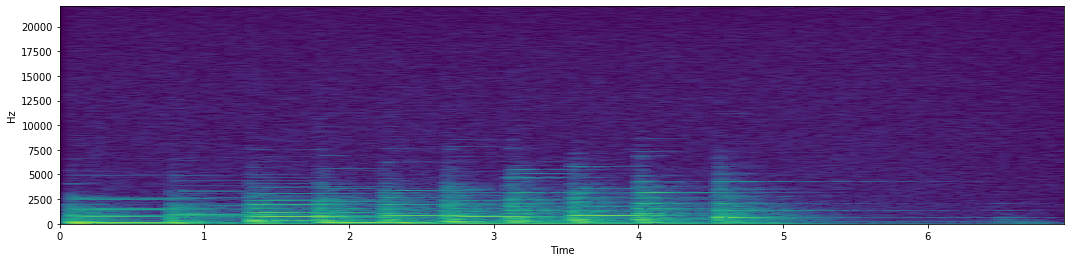

In [129]:
n_fft = int(np.power(2, np.ceil(np.log2(np.abs(int(sr*0.1))))))
spec, phase = librosa.magphase(librosa.stft(audio, n_fft=n_fft, win_length = n_fft, hop_length = int(n_fft - 7*n_fft/8), window='hann'))
nframe = len(spec[0])

plt.figure(figsize=(18,4))
librosa.display.specshow(np.log(spec + 0.001), cmap='viridis', x_axis='time', y_axis='linear',hop_length = int(n_fft - 7*n_fft/8),sr=sr)
#plt.ylim(0,1000)
plt.show()

compute spectral centroid (SC) and spectral spread (SS)

In [131]:
fi = np.linspace(0,int(sr/2),int(n_fft/2))
ti = np.linspace(0,len(audio)/sr,nframe)
print(ti[-1])
sc = []
ss = []

for i in range(0,nframe):
  X = spec[:-1,i]
  sc.append(np.sum(np.multiply(fi,np.power(np.abs(X),2)))/np.sum(np.power(np.abs(X),2)))
  ss.append(np.sqrt(np.sum(np.power(np.subtract(fi,sc[i]),2)*np.power(np.abs(X),2))/np.sum(np.power(np.abs(X),2))))
                    
                    

6.919546485260771


plot spectral centroid (SC) and spectral spread (SS)

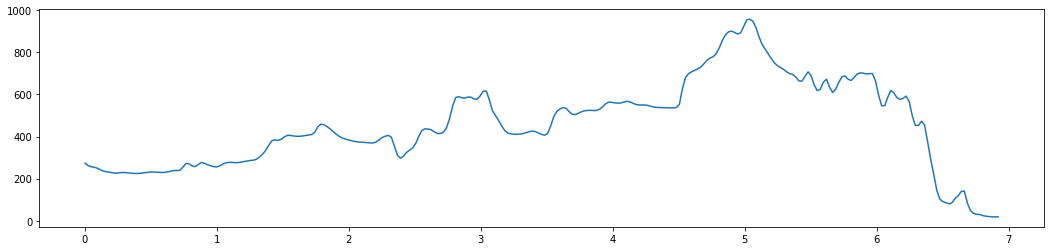

In [132]:
plt.figure(figsize=(18,4))
plt.plot(ti,sc)
plt.show()

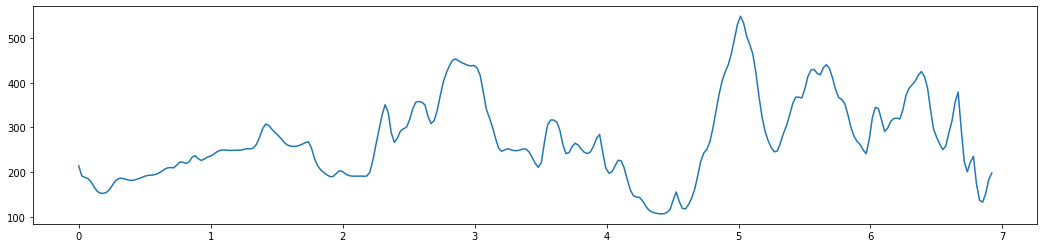

In [133]:
plt.figure(figsize=(18,4))
plt.plot(ti,ss)
plt.show()

compute spectral flatness (SF)

In [120]:
# SF is a subband-based feature (SF_b where b is a band)
# first compute filterbank frequencies using bark band (critical band)
bf = [0, 100, 200, 300, 400, 510, 630, 770, 920, 1080, 1270, 1480, 1720, 2000, 2320, 2700, 3150, 3700, 4400, 5300, 6400, 7700, 9500, 12000, 15500, 20000] # bark band frequencies
nband = len(bf)-1 # number of subbands


bf_idx = []
for i in range(0,nband):
  temp = np.abs(bf[i+1]-fi)
  bf_idx.append([j for (j, val) in enumerate(temp) if val == np.min(np.abs(bf[i+1]-fi))][0])

n_b = [bf_idx[0]]
for i in range(0,nband-1):
  n_b.append(bf_idx[i+1]-bf_idx[i]+1)
  
ff = []
for i in range(0,nband):
  if i == 0:
    ff.append(list(range(1,bf_idx[i])))
  else:
    ff.append(list(range(bf_idx[i-1]+1,bf_idx[i])))

sf = np.zeros((18,nframe))
for i in range(0,nframe):
  X = spec[:-1,i]
  for j in range(0,18):
    # (geometric mean)/(arithmetic mean)
    sf[j,i] = np.power(np.prod(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2)),1/n_b[j])/(np.sum(np.power(np.add(np.abs([X[k] for k in ff[j]]),np.finfo(float).eps),2))/n_b[j])

    
sfm = []
for i in range(0,nframe):
  temp = sf[:,i]
  sfm.append(np.mean(temp[np.isfinite(temp)]))

print(sfm)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0.15855504939188914, 0.39923755866819666, 0.32112205895979745, 0.23308428990686123, 0.1977546680387018, 0.14598173160928452, 0.09214324043694483, 0.07436274116921052, 0.05919729825334295, 0.052711231731757215, 0.045335132996668595, 0.03421505351820474, 0.023798654673708966, 0.016756233507493907, 0.016310802929569778, 0.01389343103039588, 0.011765155964006298, 0.007577565481173683, 0.006741274450871497, 0.006596492630050198, 0.005934377422112109, 0.0063822899371897375, 0.005321203197881569, 0.004703596609164737, 0.004079049948516276, 0.003476627783520133, 0.003037994178903938, 0.003803208346468435, 0.003501902669569701, 0.002758243908908409, 0.006919825845722089, 0.09282341228487047, 0.1740147093224083, 0.1620099473249637, 0.13333377481866618, 0.09532379866950663, 0.06681198410656225, 0.049751441995364326, 0.036500748380224574, 0.02922275923043803, 0.03212609535053504, 0.03502960090055943, 0.03464183384371847, 0.031795183625448746, 0.02498888586564768, 0.022057853844804607, 0.018941066

plot spectral flatness (SF)

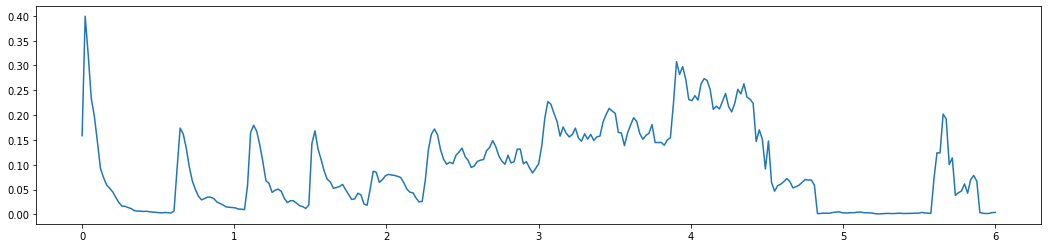

In [121]:
plt.figure(figsize=(18,4))
plt.plot(ti,sfm)
plt.show()

compute and plot MFCC

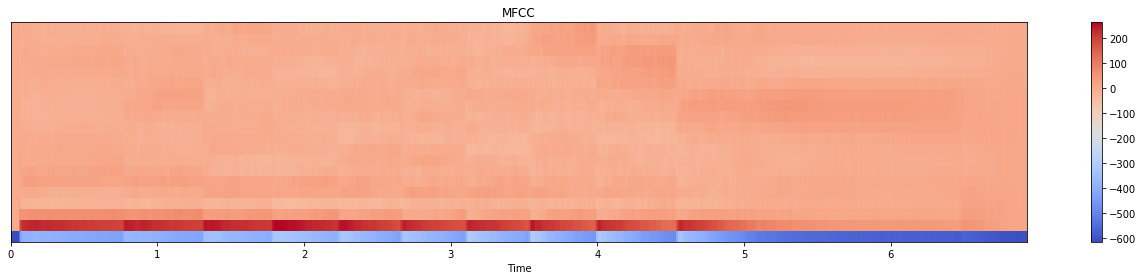

In [122]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr)
plt.figure(figsize=(18,4))
librosa.display.specshow(mfcc, x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# Class2 - 2 : Tonal features (cqt & chromagram)

compute and plot constant-Q transform

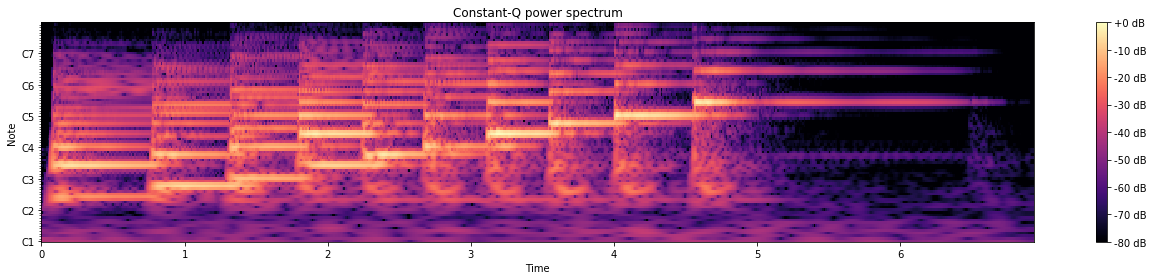

In [123]:
C = np.abs(librosa.cqt(y=audio, sr=sr))
plt.figure(figsize=(18,4))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()

compute and plot chromagram

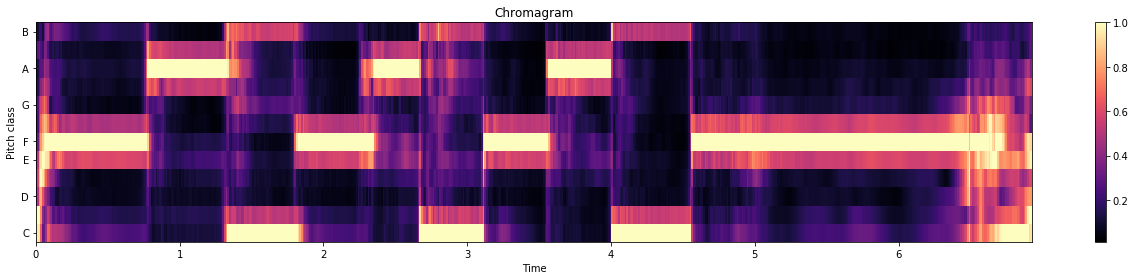

In [124]:
chromagram = librosa.feature.chroma_cqt(y=audio, sr=sr)
plt.figure(figsize=(18,4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time',sr=sr)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# Class2 - 3 : Pitch Estimation

paly audio

In [125]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np


audio_path = 'T39-piano.wav'

audio, sr = librosa.load(audio_path, sr=None)
print('sample rate of this audio file :', sr, 'Hz')
ipd.Audio(audio, rate=sr, autoplay=False) # play audio

sample rate of this audio file : 44100 Hz


finding Spectral peaks

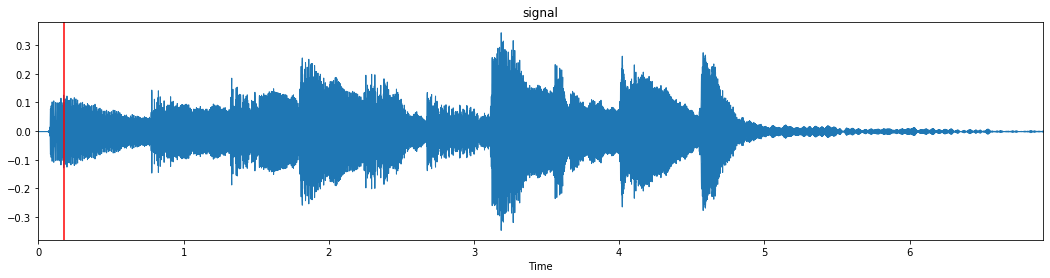

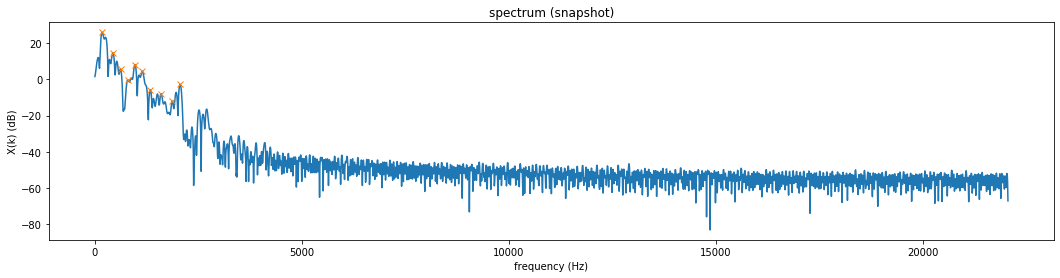

In [126]:
import scipy.signal as signal
from scipy.signal import find_peaks

# first compute spectrogram
M = 1024
win = np.hamming(M)
zpf = 5
nfft = M*zpf

spec = librosa.core.stft(audio, n_fft=nfft, hop_length=int(M/2), win_length=M, window=win, center=True)
nframe = np.shape(spec)[1]

# find spectral peaks
binsize = sr/nfft
m = 10 # number of peaks to be found
peaks = np.zeros((m,nframe))
frqs = np.zeros((m,nframe))
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])

for i in range(0,nframe):
  X = spec[:,i]
  Xdb = 20*np.log10(np.abs(X)+0.000001)
  if np.mean(Xdb) < -80:
    peaks[:,i] = np.zeros((m))
    frqs[:,i] = np.zeros((m))
  else:
    peak, _ = find_peaks(Xdb, distance=20)
    peak_values = Xdb[peak]
    # get top m peaks
    top_m = np.sort(peak[np.argpartition(peak_values,-m)[-m:]])
    peaks[:,i] = top_m/np.shape(spec)[0]*sr/2
    frqs[:,i] = Xdb[top_m]


    
# plot t'th snapshot
t = 15


plt.figure(figsize=(18,4))
librosa.display.waveplot(audio, sr)
plt.title('signal')
plt.axvline(x=t/nframe*len(audio)/sr,color='r')
plt.show()

plt.figure(figsize=(18, 4))
plt.title('spectrum (snapshot)')
plt.xlabel('frequency (Hz)')
plt.ylabel('X(k) (dB)')
plt.plot(fi,20*np.log10(np.transpose(np.abs(spec[:,t]))+0.000001))
plt.plot(peaks[:,t], frqs[:,t], "x")
plt.show()



Pitch estimation using HPS(Harmonic Product Spectrum)

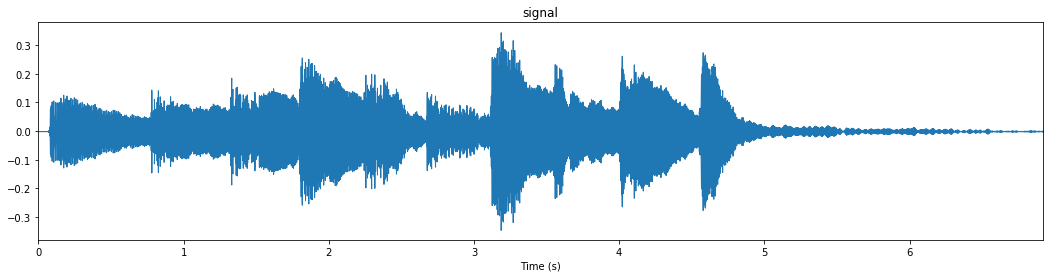

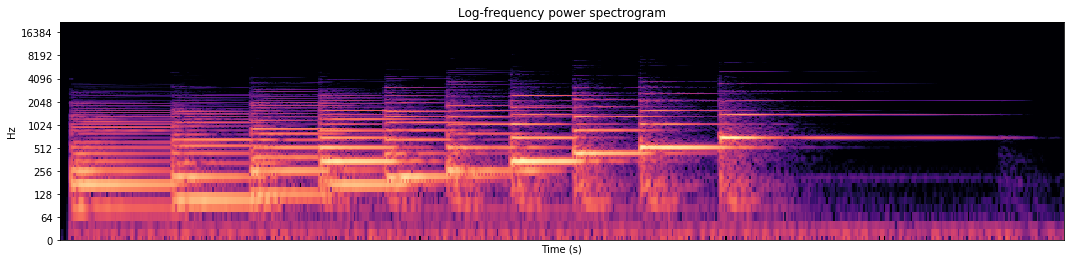

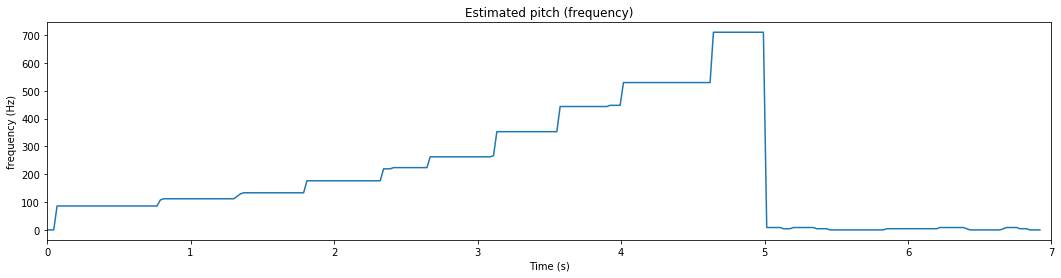

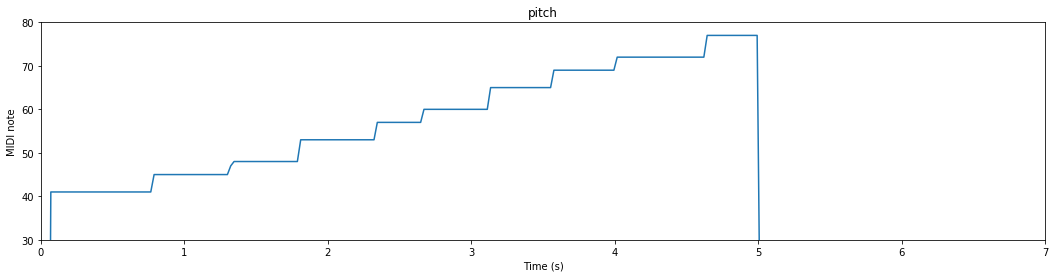

In [127]:
from scipy.signal import medfilt


# HPS(Harmonic Product Spectrum)
def hps(Xdb,ndeci):
  X_hps = -80*np.ones((len(Xdb),ndeci))
  for i in range(1,ndeci):
    X_ds = Xdb[0::i]
    nzeros = len(Xdb) - len(X_ds)
    pad = -80*np.ones(nzeros)
    X_hps[:,i] = np.append(X_ds, pad)
  return np.sum(X_hps,axis=1)


# compute spectrogram
M = 2048
win = np.hamming(M);
zpf = 5;
nfft = M*zpf;

spec = librosa.core.stft(audio, n_fft=nfft, hop_length=int(M/2), win_length=M, window=win, center=True)
hpspec = np.zeros(np.shape(spec))
nframe = np.shape(spec)[1]
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])
ti = np.linspace(0, len(audio)/sr, num=np.shape(spec)[1])

# estimate pitch
for i in range(0,nframe):
  hpspec[:,i] = hps(20*np.log10(np.abs(spec[:,i])),5)

# pick peak for f0
p_hps = []
for i in range(0,nframe):
  X = hpspec[:,i]  
  p_hps.append(np.argmax(X)/np.shape(spec)[0]*sr/2)
  
# smoothing using median filtering
p_sm = medfilt(p_hps,11)


# convert to MIDI note
m = np.round(12*np.log2(p_sm/440 + 0.0001)) + 69


plt.figure(figsize=(18,4))
librosa.display.waveplot(audio, sr)
plt.title('signal')
plt.xlabel('Time (s)')
plt.show()

plt.figure(figsize=(18,4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr)
plt.title('Log-frequency power spectrogram')
plt.xlabel('Time (s)')
plt.show()

plt.figure(figsize=(18, 4))
plt.title('Estimated pitch (frequency)')
plt.xlabel('Time (s)')
plt.ylabel('frequency (Hz)')
plt.xlim([0,7])
plt.plot(ti,p_sm)
plt.show()


plt.figure(figsize=(18, 4))
plt.title('pitch')
plt.xlabel('Time (s)')
plt.ylabel('MIDI note')
plt.ylim([30,80])
plt.xlim([0,7])
plt.plot(ti,m)
plt.show()
